# SPRING 2021
# Applied Machine Learning, HW 6

*Instructions:* Read all problems very carefully. Make sure that you are answering all questions included in a given problem. Every problem has a code cell inserted at the very end. You must show your solution in the code cell and run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

*Direction:* do every item in a separte code cell.

In this problem, you will be working with the miles-per-galon (MPG) and horsepower data from the Auto MPG data set. 

1. Mount your Google Drive to Google Colab.
2. Copy the NumPy array files `'mpg.npy'` and `'horsepower.npy'` from the shared Google Drive folder to some folder on your Google Drive. Create a new `Path` object using the `pathlib` library pointing to this folder. For example, for me, the path looks like this: 

  `'/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/Auto_MPG'`

  But yours might be different. Use the name `PATH` for this object.
3. Load the MPG and weight data from the `'mpg.npy'` and `'horsepower.npy'`. Save the data in the form of two NumPy arrays named `mpg` and `hp`. 
4. Demonstrate that the horsepower array contains six missing values. 
4. In what follows, you will need to perform a linear regression on these data treating `mpg` and a label (or *target*) and `hp` as a feature. Since the horsepower data contain missing values, we will need to do something about them. In this homework, we will learn how to use a special scikit-learn class `SimpleImputer()` to deal with the missing values. First of all, go to the Scikit-Learn web-site and read [the description of this class](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html). Then import it using the following import statement: `from sklearn.impute import SimpleImputer`. 
5. Build a scikit-learn pipeline called `pipe` containing the following steps (don't forget to import all required classes!): 
  * Imputing the missing values with `SimpleImputer()`: note that when used with default parameters, this imputer will simply replace all missing horsepower data with the mean values of the `hp` array. This is what we will do here.
  * Scaling the data using `StandardScaler()`. 
  * Creating a new feature which is equal to the square of the horsepower array.
  * Fitting a linear regression model with `LinearRegression()`.

  Name these steps `'imputer'`, `'scaler'`, `'poly_2'`, and `'lr'`, respectively. Then fit this pipeline on the horsepower and MPG data and print the weights and the bias term to the screen.
6. Create a scatter plot showing the data points (plot the `mpg` values on the vertical and the `hp` values on the horizonatal axis; don't forget to import a required library). Label your horizontal and vertical axes as "Horsepower" and "MPG", respectively. Add a title to the plot saying "Auto MPG data: city-cycle". Set the `figsize` parameter of `plt.figure` to `(5, 5)`. Now add your best fit polynomial curve to this graph. To do that:
  * Use `np.linspace` to create an array of 100 evenly spaced horsepower values between 30 and 240 (make the limiting values inclusive). Call this array `x`.
  * Predict the MPG values on `x` using your pipeline. Save the result as `y_pred`.
  * On the same graph, plot `y_pred` versus `x` (use the red color). This is your best fit polynomial.
7. Does the best fit line look reasonable? 


In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from pathlib import Path
PATH = Path('/content/gdrive/My Drive/Colab Notebooks/Auto_MPG')

In [3]:
import numpy as np
mpg = np.load(PATH/'mpg.npy')
hp = np.load(PATH/'horsepower.npy')

In [4]:
mask_hp = np.isnan(hp)
print(np.count_nonzero(mask_hp))

6


In [5]:
from sklearn.impute import SimpleImputer

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
pipe = Pipeline([ 
                 ('imputer', SimpleImputer()),
                 ('scaler', StandardScaler()),
                 ('poly_2', PolynomialFeatures(degree=2)),
                 ('lr', LinearRegression())
                  ])
x = hp.reshape(-1,1)
y = mpg.reshape(-1,1)
pipe.fit(x,y)
print(pipe['lr'].coef_)         #weights
print(pipe['lr'].intercept_)  #bias term

[[ 0.         -7.90857711  1.72858985]]
[21.78598301]


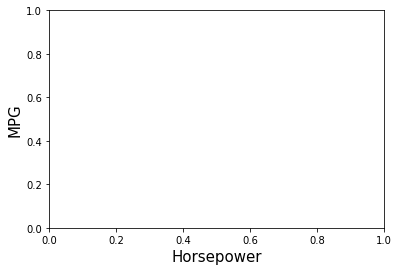

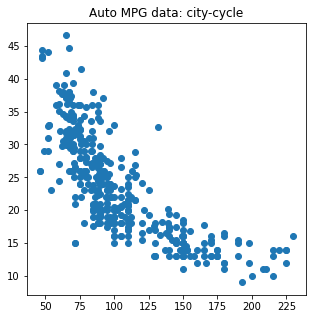

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.xlabel("Horsepower", fontsize=15)
plt.ylabel("MPG", fontsize=15)
plt.figure(figsize=(5, 5))
plt.plot(hp, mpg, 'o')
plt.title("Auto MPG data: city-cycle")
plt.show()

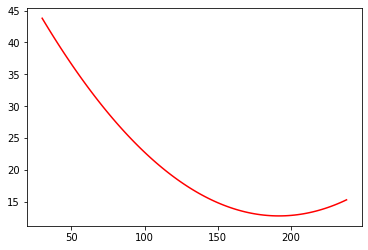

In [8]:
x = np.linspace(30, 240,num=100,endpoint= False)
x=x.reshape(-1,1)
y_pred = pipe.predict(x)
y_pred = y_pred.reshape(-1,1)
plt.plot(x, y_pred, color='red')
plt.show()

The best fit line looks somewhat reasonable

**Problem 2**

*Direction:* do every item in a separte code cell.

1. Using NumPy `np.linspace` function create a NumPy array of 101 (one hundred and one) evenly spaced values from 0 to 1 (both limits are inclusive). Call it `x` and print the first ten elements of `x` to the screen.
2. Create a NumPy array called `y` using the following formula: $y = -3.1 - 5.3 x + 11.7 x^2 -4.7 x^3 $, where `x` is the array you created in step 1. Print the first ten elements of `y` to the screen.
3. Now, let's add some noise to the $y$ values. To this end, set the NumPy random seed equal to 123 and immediately after that create an array called `noise_1` that contains 101 values pulled from the normal distribution with a mean of 0 and a standard deviation of 0.3. Print the first ten elements of `noise_1` to the screen.
4. Add `noise_1` to `y` and save the result as `y_1`. Print the first ten elements of `y_1` to the screen. We will be using this array as a label. 
5. Repeat steps 4 and 5 with a random seed of 456 creating new noise and label arrays (use the same array `y`); name these arrays `noise_2` and `y_2`, respectively.
6. Create a scatter plot showing both sets of data points on the same set of axes; show the seed 123 data points in blue and the seed 456 data points in green. The title of your plot must say $y = -3.1 - 5.3 x + 11.7 x^2 -4.7 x^3 + \text{noise}$ (you are not required to use $\LaTeX$ math typing if you are not familiar with it -- it is okay to use regular English characters 'x' and 'y'; use the caret sybol '^' to represent exponential powers, e.g., 'x^2'. Set the `figsize` parameter of `plt.figure` to `(5, 5)`. Label the horizontal and vertical axes as $x$ and $y$, respectively, using some reasonable fontsize.
7. Now, let's try fitting this data with a 20th degree polynomial function. To this end, build a scikit-learn pipeline called `blue` containing all required steps. Use `LinearRegression()` for fitting and, of course, don't forget to create the required polynomial features. It is up to you how you would like to name these steps; you are also expected to arrange them in the right order. There is no need to scale the data because our feature values are from 0 to 1. After the pipeline is created, fit it on the `x` and `y_1` array data treating the former as your feature and the latter as the label. Print the weights and the bias term to the screen.
8. Predict the label values on `x` and save the result as `y_pred`. Create a new scatter plot showing only the data points created with the random seed of 123 and plot the best fit polynomial curve on the same graph (your `y_pred` values). The title of your plot must now show the $\text{RMSE}$ values for the fit (keep only 5 decimal places). Set the figsize parameter of `plt.figure` to `(5, 5)`. Label the horizontal and vertical axes as  $x$  and  $y$, respectively, using some reasonable fontsize.
9. Create a new scatter plot showing only the data points created with the random seed of 456 and plot the `y_pred` vs `x` curve on the same graph (use the same `y_pred` that you created in the previous step). The title of your plot must now show the $\text{RMSE}$ values for the fit (keep only 5 decimal places). Set the figsize parameter of `plt.figure` to `(5, 5)`. Label the horizontal and vertical axes as  $x$  and  $y$, respectively, using some reasonable fontsize.
10. Which one of the two $\text{RMSE}$ values would you trust more and why?
11. Repeat step 7 using lasso regression with $\alpha = 0.005$  in place of `LinearRegression()`. Call this new pipeline `lasso`.
12. Repeat steps 8 through 9 using the new `lasso` pipeline in place of `blue`. 
  * How does the overall shape of the best fit curve differ from the one obtained with `LinearRegression()`?
  * Did you notice something interesting about the numerical values of the weights? What is it?



In [9]:
x = np.linspace(0,1,num=101,endpoint=False)
print(x[:10])

[0.         0.00990099 0.01980198 0.02970297 0.03960396 0.04950495
 0.05940594 0.06930693 0.07920792 0.08910891]


In [10]:
y = -3.1 - 5.3*(x) + 11.7*(x)**2 - 4.7*(x)**3
print(y[:10])

[-3.1        -3.15133286 -3.2003992  -3.24722639 -3.2918418  -3.3342728
 -3.37454676 -3.41269105 -3.44873304 -3.4827001 ]


In [11]:
np.random.seed(123)
noise_1 = np.random.normal(0,0.3,size=101)
print(noise_1[:10])

[-0.32568918  0.29920363  0.08489355 -0.45188841 -0.17358008  0.49543096
 -0.72800377 -0.12867379  0.37978088 -0.26002212]


In [12]:
y_1 = y + noise_1
print(y_1[:10])

[-3.42568918 -2.85212923 -3.11550565 -3.69911481 -3.46542188 -2.83884184
 -4.10255053 -3.54136484 -3.06895216 -3.74272222]


In [13]:
np.random.seed(456)
noise_2 = np.random.normal(0,0.3,size=101)
print(noise_2[:10])
print('\n')
y_2 = y + noise_2
print(y_2[:10])

[-0.20043855 -0.14946286  0.18557275  0.17060767  0.40515284  0.48887656
  0.09058986  0.13484495 -0.10374334 -0.09456925]


[-3.30043855 -3.30079572 -3.01482646 -3.07661872 -2.88668896 -2.84539624
 -3.2839569  -3.2778461  -3.55247638 -3.57726935]


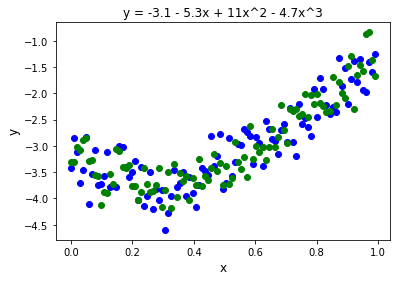

<Figure size 360x360 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y_1, 'bo')
plt.plot(x,y_2, 'go')
plt.xlabel( 'x', fontsize=12)
plt.ylabel( 'y', fontsize=12)
plt.title('y = -3.1 - 5.3x + 11x^2 - 4.7x^3')
plt.figure(figsize=(5, 5))
plt.show()

In [32]:
blue = Pipeline([
              ('poly', PolynomialFeatures(degree=20, include_bias=False)),
             ('lr', LinearRegression())    
])
x = x.reshape(-1,1)
y_1 = y_1.reshape(-1,1)
blue.fit(x,y_1)
print(blue['lr'].coef_)
print(blue['lr'].intercept_)

[[ 1.60177701e+02 -1.58988128e+04  6.45137908e+05 -1.45201866e+07
   2.06361667e+08 -1.99842576e+09  1.38708388e+10 -7.14722237e+10
   2.80214371e+11 -8.50134006e+11  2.01732360e+12 -3.76438343e+12
   5.52566271e+12 -6.34815018e+12  5.64238676e+12 -3.80163387e+12
   1.87654321e+12 -6.39944774e+11  1.34710665e+11 -1.31877192e+10]]
[-3.41185043]


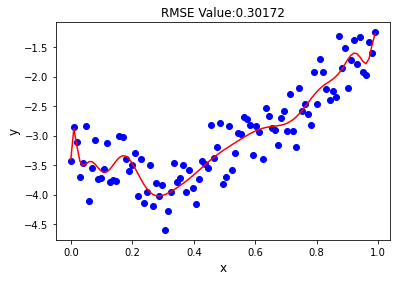

In [40]:
from sklearn.metrics import mean_squared_error
y_pred = blue.predict(x)
plt.plot(x,y_1, 'bo')
plt.xlabel( 'x', fontsize=12)
plt.ylabel( 'y', fontsize=12)
plt.plot(x,y_pred , color='red')
plt.title(f'RMSE Value:{round(mean_squared_error(y_1,y_pred,squared=False),5)}')
plt.show()

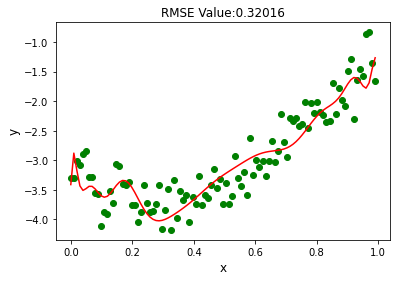

In [41]:
y_pred_2 = blue.predict(x)
plt.plot(x, y_2, 'go')
plt.xlabel('x', fontsize=12)
plt.ylabel( 'y', fontsize=12)
plt.plot(x,y_pred_2 , color='red')
plt.title(f'RMSE Value:{round(mean_squared_error(y_2,y_pred,squared=False),5)}')
plt.show()

I trust the RMSE value for the plot of x against y with the seed of 123. I say this because of the rule of thumb that the smaller the RMSE the better.

In [45]:
from sklearn.linear_model import Lasso

lasso = Pipeline([
           ('poly', PolynomialFeatures(degree=20, include_bias=False)),
           ('lasr', Lasso(alpha=0.005))       
])
lasso.fit(x,y_1)
print(lasso['lasr'].coef_)
print(lasso['lasr'].intercept_)

[-0.          0.16765461  2.235533    0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
[-3.62630925]


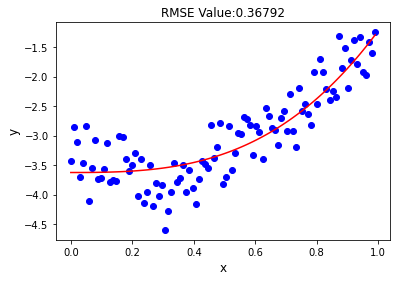

In [46]:
y_pred = lasso.predict(x)
plt.plot(x,y_1, 'bo')
plt.xlabel( 'x', fontsize=12)
plt.ylabel( 'y', fontsize=12)
plt.plot(x,y_pred , color='red')
plt.title(f'RMSE Value:{round(mean_squared_error(y_1,y_pred,squared=False),5)}')
plt.show()

In [50]:
lasso.fit(x,y_2)
print(lasso['lasr'].coef_)
print(lasso['lasr'].intercept_)

[-0.          0.          2.53925194  0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
-3.614853633505141


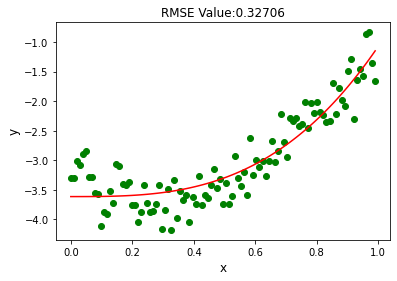

In [51]:
y_pred_2 = lasso.predict(x)
plt.plot(x, y_2, 'go')
plt.xlabel('x', fontsize=12)
plt.ylabel( 'y', fontsize=12)
plt.plot(x,y_pred_2 , color='red')
plt.title(f'RMSE Value:{round(mean_squared_error(y_2,y_pred,squared=False),5)}')
plt.show()

12. It appears that the curve using the lasso pipeline is smoother than the blue pipeline. The weights differ greatly, the lasso pipeline weights are smaller with lots of -0 and 0 values.